In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd

from util.eval_utils import concat_path, get_project_root_directory

# Meta-Adaptation Times UC-1

In [2]:
# Adjusted directory path

directory_path = concat_path(get_project_root_directory(), 'eval', 'raw', 'sos-adaptations')

# Initialize an empty dictionary to hold data for all files
data_dict_eval = {}

# Iterate through all files in the directory
for file_name in os.listdir(directory_path):

    if file_name.endswith(".log"):  # Ensure we're processing log files

        file_path = concat_path(directory_path, file_name)

        # Extract the identifier from the filename (last number before "_tta_eval")
        identifier = file_name.split('_sos_eval_')[1].replace('-chaos.log', '')
        identifier = f'192.168.56.{identifier}'

        # Read the log file and process its lines
        with open(file_path, 'r') as file:
            log_lines = file.readlines()

        # Extract relevant rows and parse the numbers after the '#' symbol
        adaptation_data = [
            int(line.split('#')[-1]) for line in log_lines if 'FINISHED-SOS-ADAPTATION' in line
        ]

        # Store only the last 100 entries (or all if less than 100)
        data_dict_eval[identifier] = adaptation_data[-50:]

# Create a DataFrame from the dictionary
df = pd.DataFrame.from_dict(data_dict_eval, orient='columns')
df




,192.168.56.24,192.168.56.31,192.168.56.32,192.168.56.30,192.168.56.23,192.168.56.33,192.168.56.28
0,5043,4643,4564,4442,4735,4509,3433
1,4575,4342,4615,4464,4709,4716,3874
2,4950,4634,184,4471,4371,4626,3406
3,4251,4521,4638,4540,4773,4562,3751
4,3490,4422,4784,4434,4388,4605,4224
5,4451,4545,4461,4415,4013,4568,3972
6,4072,4440,179,4489,4128,4691,3247
7,5017,4537,4614,4437,4600,4453,5110
8,5003,4441,4561,4841,4551,4835,4087
9,4333,4540,4555,4566,3782,4653,3631


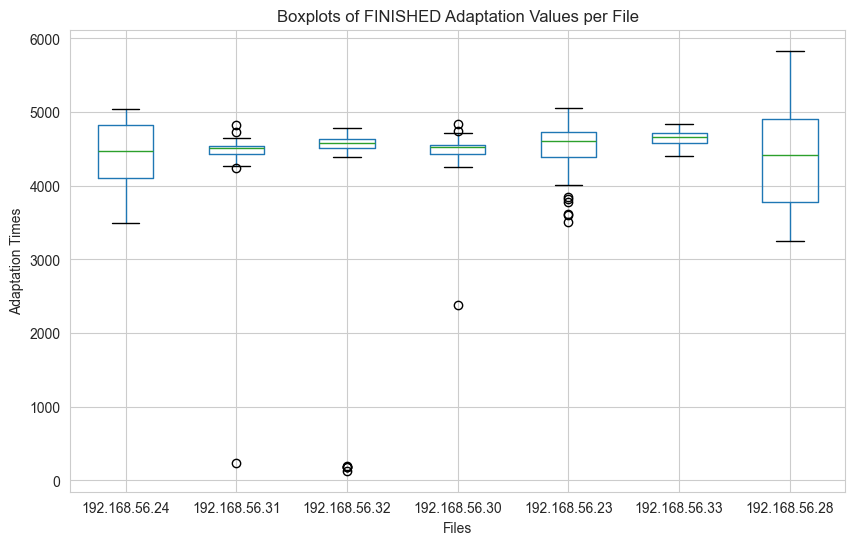

In [3]:
# Create boxplots for each column in the DataFrame
df.boxplot(figsize=(10, 6))

# Add labels and title
plt.title("Boxplots of FINISHED Adaptation Values per File")
plt.ylabel("Adaptation Times")
plt.xlabel("Files")

# Display the plot
plt.show()

In [4]:
# eliminate the outliers

outliers = {
    '31': [239],
    '32': [132, 176, 179, 184, 194],
    '30': [2376]
}

# Loop through each specified column and remove the outliers
for suffix, values in outliers.items():
    column_name = f"192.168.56.{suffix}"
    if column_name in df.columns:
        df[column_name] = df[column_name][~df[column_name].isin(values)]

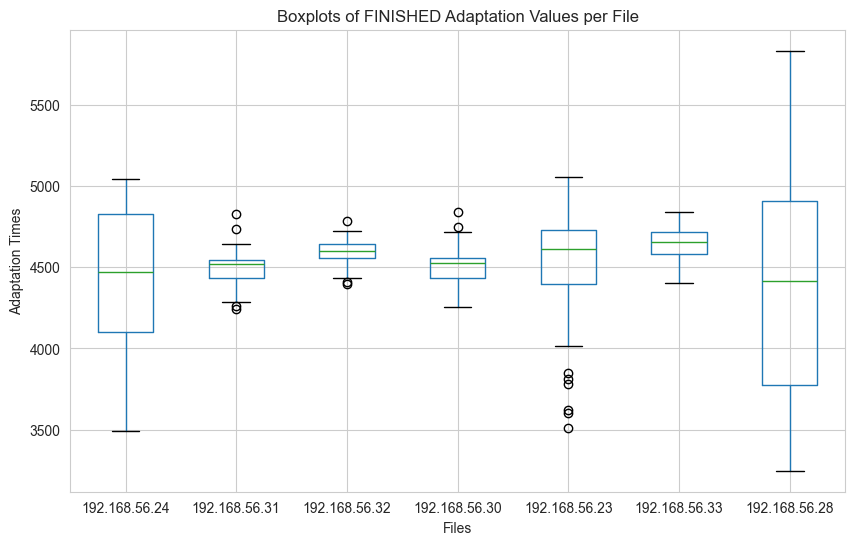

In [5]:
# Create boxplots for each column in the DataFrame
df.boxplot(figsize=(10, 6))

# Add labels and title
plt.title("Boxplots of FINISHED Adaptation Values per File")
plt.ylabel("Adaptation Times")
plt.xlabel("Files")

# Display the plot
plt.show()

In [6]:
# reorder according to tree: ['192.168.56.24', '192.168.56.30', '192.168.56.31', '192.168.56.23', '192.168.56.28', '192.168.56.32', '192.168.56.33']
desired_order = [
    '192.168.56.24',
    '192.168.56.30',
    '192.168.56.31',
    '192.168.56.23',
    '192.168.56.28',
    '192.168.56.32',
    '192.168.56.33'
]

# Reorder the columns in the DataFrame
df = df[desired_order]
df

,192.168.56.24,192.168.56.30,192.168.56.31,192.168.56.23,192.168.56.28,192.168.56.32,192.168.56.33
0,5043,4442.0,4643.0,4735,3433,4564.0,4509
1,4575,4464.0,4342.0,4709,3874,4615.0,4716
2,4950,4471.0,4634.0,4371,3406,NaN,4626
3,4251,4540.0,4521.0,4773,3751,4638.0,4562
4,3490,4434.0,4422.0,4388,4224,4784.0,4605
5,4451,4415.0,4545.0,4013,3972,4461.0,4568
6,4072,4489.0,4440.0,4128,3247,NaN,4691
7,5017,4437.0,4537.0,4600,5110,4614.0,4453
8,5003,4841.0,4441.0,4551,4087,4561.0,4835
9,4333,4566.0,4540.0,3782,3631,4555.0,4653


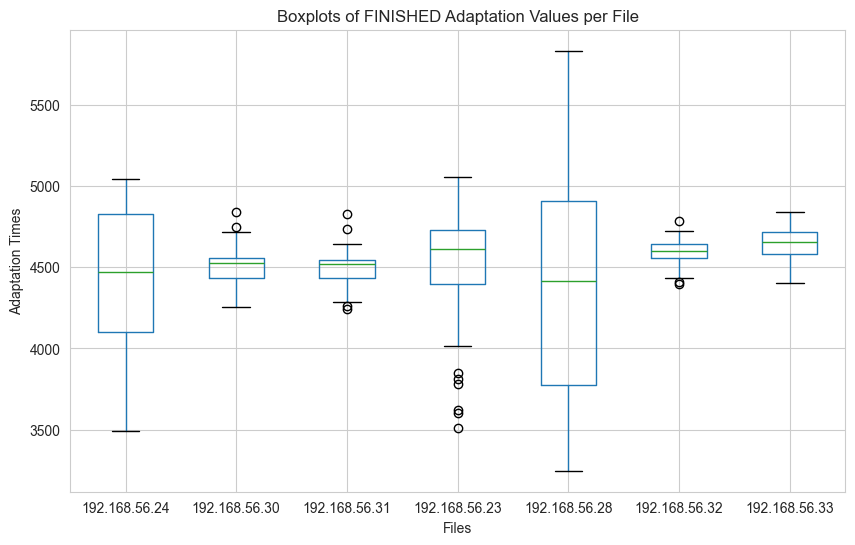

In [7]:
# Create boxplots for each column in the DataFrame
df.boxplot(figsize=(10, 6))

# Add labels and title
plt.title("Boxplots of FINISHED Adaptation Values per File")
plt.ylabel("Adaptation Times")
plt.xlabel("Files")

# Display the plot
plt.show()

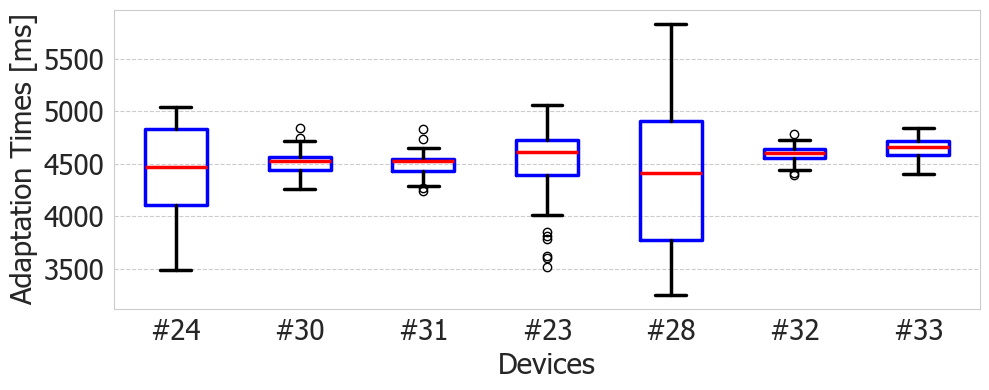

In [9]:
from util.utils import generate_timestamp_for_filename

# Copy and rename the DataFrame for plotting
df_plot = df.copy()

# Define a dictionary mapping old column names to new ones
new_column_names = {
    '192.168.56.24': '#24',
    '192.168.56.30': '#30',
    '192.168.56.31': '#31',
    '192.168.56.23': '#23',
    '192.168.56.28': '#28',
    '192.168.56.32': '#32',
    '192.168.56.33': '#33'
}

# Rename the columns in the DataFrame
df_plot.rename(columns=new_column_names, inplace=True)

# Set a more modern and professional style using seaborn
plt.rc('font', family='Tahoma')

# Create the boxplot
boxplot = df_plot.boxplot(figsize=(10, 4), grid=False,
                          boxprops=dict(color="blue", linewidth=2.5),
                          whiskerprops=dict(linewidth=2.5),
                          capprops=dict(linewidth=2.5),
                          medianprops=dict(color="red", linewidth=2.5))
# boxplot = df_plot.boxplot(figsize=(12, 8), grid=False, 
#     boxprops=dict(color="steelblue", linewidth=2.5),  # Softer blue
#                           whiskerprops=dict(color="skyblue", linewidth=2.5),  # Light sky blue
#                           capprops=dict(color="deepskyblue", linewidth=2.5),  # Deep sky blue for contrast
#                           medianprops=dict(color="coral", linewidth=2.5)  # Warm coral for the median
#                           )

# Customize font sizes
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("Adaptation Times [ms]", fontsize=21)
plt.xlabel("Devices", fontsize=21)

# Add a subtle grid for the y-axis only
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--')

# Display the plot
plt.tight_layout()

plt.savefig(concat_path(get_project_root_directory(), 'eval', 'out',
                        f'{generate_timestamp_for_filename()}_boxplot_uc_1_meta_adaptations_v1.pdf'), format='pdf',
            bbox_inches='tight')
plt.show()

In [10]:
# Calculate quartiles, minimum, and maximum for each column
summary_stats = df.describe().T[["min", "25%", "50%", "75%", "max"]]

# Rename columns for clarity
summary_stats.rename(columns={
    "min": "Minimum",
    "25%": "Q1 (25%)",
    "50%": "Median (50%)",
    "75%": "Q3 (75%)",
    "max": "Maximum"
}, inplace=True)

# Print the summary statistics
print(summary_stats)

               Minimum  Q1 (25%)  Median (50%)  Q3 (75%)  Maximum
192.168.56.24   3490.0   4101.75        4470.0   4825.50   5043.0
192.168.56.30   4255.0   4434.00        4526.0   4558.00   4841.0
192.168.56.31   4240.0   4432.00        4521.0   4543.00   4826.0
192.168.56.23   3511.0   4395.00        4613.5   4727.75   5053.0
192.168.56.28   3247.0   3773.25        4414.5   4907.50   5833.0
192.168.56.32   4395.0   4555.00        4600.0   4643.00   4784.0
192.168.56.33   4404.0   4580.00        4658.0   4714.25   4843.0
